# Forecasting Gold Price

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Reading Dataset

In [2]:
data = pd.read_csv('E:\\Gold data.csv')

In [3]:
data.shape

(266, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      266 non-null    object 
 1   Price     266 non-null    float64
 2   Open      266 non-null    float64
 3   High      266 non-null    float64
 4   Low       266 non-null    float64
 5   Vol       266 non-null    object 
 6   Change %  266 non-null    float64
dtypes: float64(5), object(2)
memory usage: 14.7+ KB


In [5]:
data.describe()

,Price,Open,High,Low,Change %
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,1812.395489,1812.517105,1821.249060,1802.780075,-0.000113
std,54.261122,54.203584,53.568378,54.379552,0.009380
min,1689.800000,1691.200000,1711.000000,1680.000000,-0.046400
25%,1777.937500,1775.700000,1788.475000,1767.000000,-0.003775
50%,1804.900000,1805.600000,1814.650000,1793.750000,0.000300
75%,1852.950000,1850.575000,1862.300000,1845.800000,0.004400
max,1974.900000,1975.900000,1979.900000,1965.300000,0.034200


In [6]:
data.head()

,Date,Price,Open,High,Low,Vol,Change %
0,"Dec 04, 2020",1855.6,1850.0,1860.4,1842.8,0.07K,0.0003
1,"Dec 07, 2020",1881.3,1856.9,1873.2,1850.0,0.18K,0.0139
2,"Dec 08, 2020",1889.8,1877.0,1886.6,1874.5,0.20K,0.0045
3,"Dec 09, 2020",1853.1,1883.1,1883.1,1844.0,0.11K,-0.0194
4,"Dec 10, 2020",1852.5,1866.3,1866.3,1866.3,0.01K,-0.0003


# 2. Pre-Processing Dataset

In [7]:
data = data[['Date','Price']]
data.Date = pd.to_datetime(data.Date, format = '%b %d, %Y')
data.set_index('Date',drop = True, inplace = True)
print(data.shape)
data.head()

(266, 1)


,Price
Date,
2020-12-04,1855.6
2020-12-07,1881.3
2020-12-08,1889.8
2020-12-09,1853.1
2020-12-10,1852.5


In [8]:
import datetime
#from datetime import timedate

base = datetime.datetime(data.index.min().year, data.index.min().month, data.index.min().day)
arr = np.array([base + datetime.timedelta(days = i) for i in range((data.index.max() - data.index.min()).days+1)])
data_temp = pd.DataFrame(arr, columns=['date']).set_index('date', drop=True)
print(data_temp.shape)
data_temp.head(10)

(368, 0)


""
date
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12


In [9]:
data = pd.merge(left=data_temp, right=data,
                     left_on=data_temp.index, right_on=data.index,
                     how='left')
print(data.head(10))
data.set_index('key_0', drop=True, inplace=True)

       key_0   Price
0 2020-12-04  1855.6
1 2020-12-05     NaN
2 2020-12-06     NaN
3 2020-12-07  1881.3
4 2020-12-08  1889.8
5 2020-12-09  1853.1
6 2020-12-10  1852.5
7 2020-12-11  1858.7
8 2020-12-12     NaN
9 2020-12-13     NaN


In [10]:
data.fillna(method = 'ffill',inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 368 entries, 2020-12-04 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   368 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [12]:
data.head()

,Price
key_0,
2020-12-04,1855.6
2020-12-05,1855.6
2020-12-06,1855.6
2020-12-07,1881.3
2020-12-08,1889.8


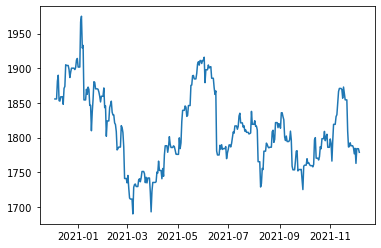

In [13]:
plt.plot(data)

# 3. Time Series Analysis

# Outlier Detection

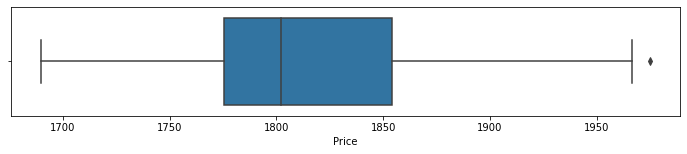

In [14]:
# Box PLot
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = data['Price'], whis = 1.5)

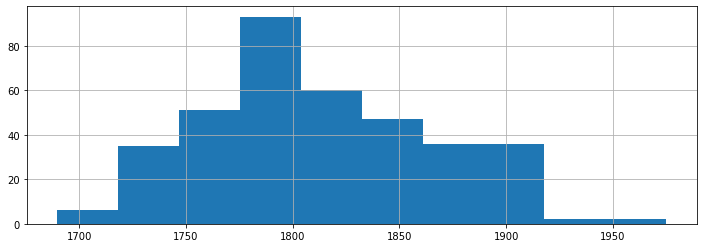

In [15]:
# Histogram
fig = data['Price'].hist(figsize = (12, 4))

There are no outliers present as per `box plot` and `histogram`.

# 4. Time Series Forecasting

In [16]:
# Train-Test split

train_len = int(data.shape[0]*0.80)
train = data[0:train_len] 
test = data[train_len:] 

In [17]:
train

,Price
key_0,
2020-12-04,1855.6
2020-12-05,1855.6
2020-12-06,1855.6
2020-12-07,1881.3
2020-12-08,1889.8
...,...
2021-09-19,1753.4
2021-09-20,1765.9
2021-09-21,1780.3


In [18]:
test

,Price
key_0,
2021-09-24,1753.80
2021-09-25,1753.80
2021-09-26,1753.80
2021-09-27,1754.00
2021-09-28,1739.50
...,...
2021-12-02,1762.70
2021-12-03,1783.90
2021-12-04,1783.90


## Comparing Different Time Series Forecasting Methods

# 4.1. Naive Method

In [19]:
# Mapping to previous value
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len - 1]

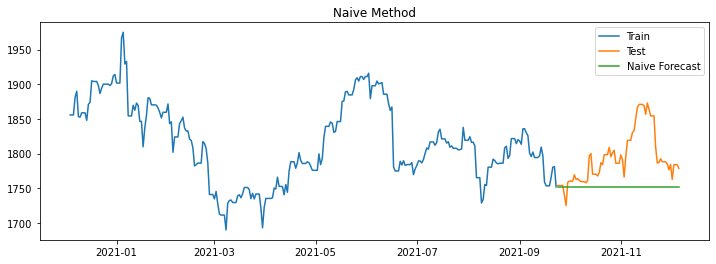

In [20]:
# plotting
plt.figure(figsize = (12, 4))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

In [21]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,55.71,2.37


## 4.2. Simple Average Method

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

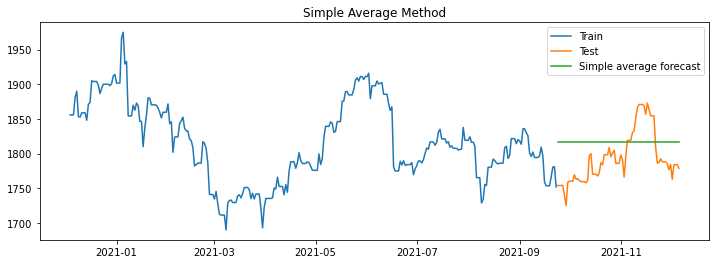

In [23]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [24]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Simple average method,42.48,2.14


## 4.3. Simple Moving Average Method

In [25]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

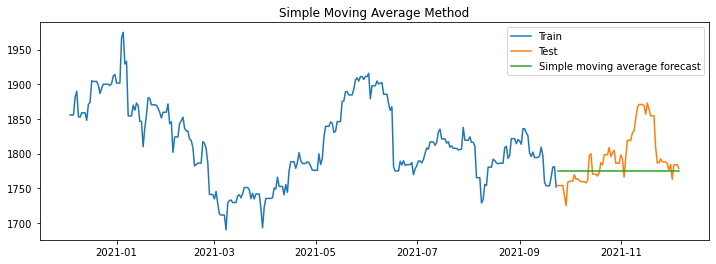

In [26]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'][train_len:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [27]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Simple moving average forecast,41.24,1.64


## 4.4. Holt's Method with Trend

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.969820494140986,
 'smoothing_trend': 9.966919928798717e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1855.6000476889885,
 'initial_trend': -0.35086082127297247,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

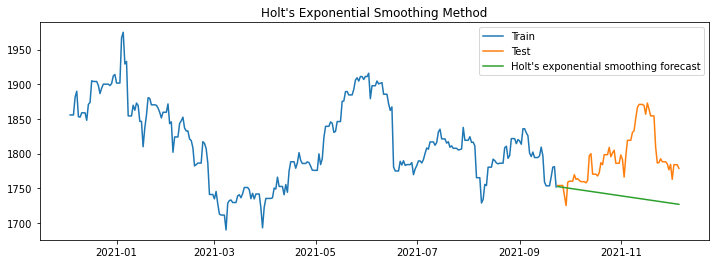

In [30]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [31]:
# Calculate RSME and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,68.16,3.05


## 4.5. Holt Winters' additive method with trend and seasonality

In [32]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.9658883753380896,
 'smoothing_trend': 9.353427274319877e-06,
 'smoothing_seasonal': 3.545562315599511e-07,
 'damping_trend': nan,
 'initial_level': 1811.5302177910698,
 'initial_trend': -0.3269214441095341,
 'initial_seasons': array([44.40620034, 43.47439266, 44.66187809, 42.43595053, 43.293479  ,
        40.32262209, 40.8637783 , 43.26678659, 42.84596303, 45.57922866,
        47.1282981 , 46.73541751]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
y_hat_hwa['hw_forecast'] = model_fit.forecast(test.shape[0])

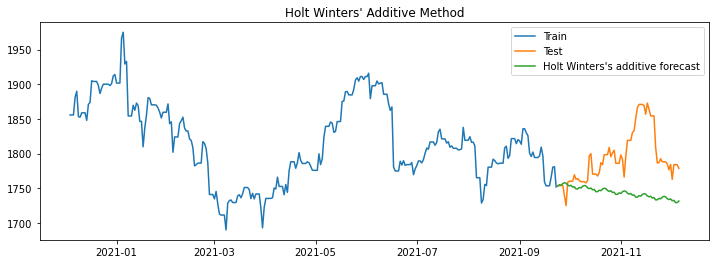

In [34]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [35]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Holt Winters' additive method,64.64,2.84


## 4.6. Holt Winter's multiplicative method with trend and seasonality

In [36]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(test.shape[0])

{'smoothing_level': 0.9721770243433262, 'smoothing_trend': 0.0007293679583560668, 'smoothing_seasonal': 2.697917792758703e-05, 'damping_trend': nan, 'initial_level': 1636.6613983923846, 'initial_trend': -0.2904283209287163, 'initial_seasons': array([1.13399487, 1.13340934, 1.13417765, 1.13275534, 1.13330831,
       1.13144861, 1.13179212, 1.13345302, 1.13331701, 1.13483931,
       1.135826  , 1.1354885 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


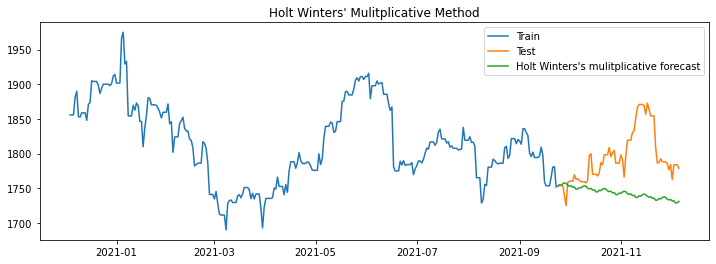

In [37]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [38]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwm['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Holt Winters' multiplicative method,64.99,2.86


### Augmented Dickey-Fuller (ADF) test

In [39]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Price'])

print('ADF Statistic: %f' % adf_test[0])
print('Ceitical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.643260
Ceitical Value @ 0.05: -2.87
p-value: 0.084382


### Box Cox transformation to make variance constant

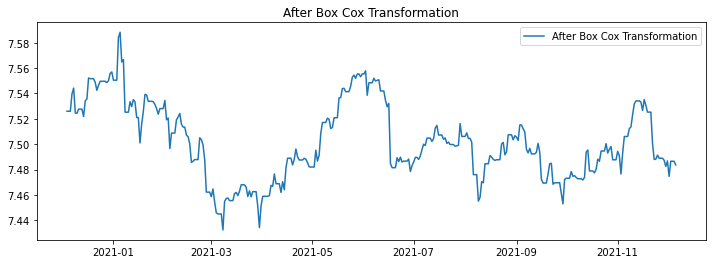

In [40]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Price'], lmbda = 0), index = data.index)
plt.figure(figsize = (12, 4))
plt.plot(data_boxcox, label = 'After Box Cox Transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox Transformation')
plt.show()

## Differencing to Remove Trend

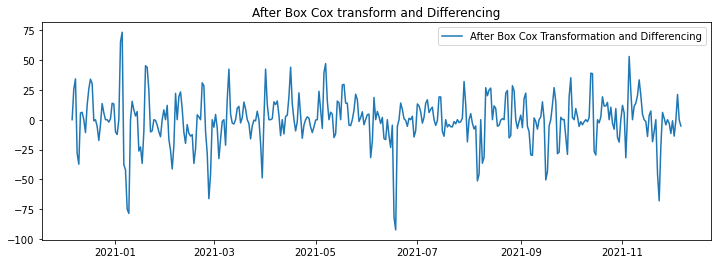

In [41]:
data_boxcox_diff = pd.Series(data['Price'] - data['Price'].shift(2), data.index)
plt.figure(figsize = (12, 4))
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox transform and Differencing')
plt.show()

In [42]:
data_boxcox_diff.dropna(inplace = True)

### Augmented Dickey-Fuller (ADF) test

In [43]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic : %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic : -4.908165
Critical Values @ 0.05: -2.87
p-value: 0.000034


## Autocorrelation Function(ACF)

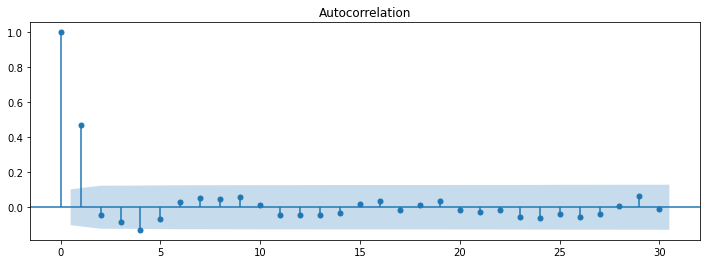

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (12, 4))
plot_acf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

## Partial Autocorrelation Function(PACF)

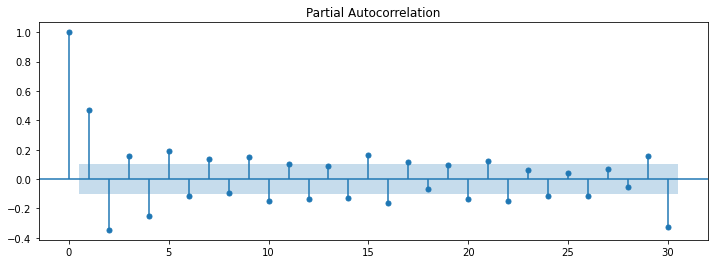

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (12, 4))
plot_pacf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

Observations,
- Series Differencing is required to remove the trend .
- Auto-correlation suggests 4/5th order dependency .

In [46]:
# Train-test split (after box-cox)

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

## 4.7 . Auto Regressive Integrated Moving Average(ARIMA)

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 2, 1), seasonal_order=(0, 0, 0, 0)) 
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  294
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 985.255
Date:                Wed, 12 Jan 2022   AIC                          -1964.510
Time:                        21:20:31   BIC                          -1953.480
Sample:                    12-04-2020   HQIC                         -1960.092
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0326      0.077     -0.424      0.671      -0.184       0.118
ma.L1         -0.9999      1.644     -0.608      0.543      -4.221       2.222
sigma2      6.728e-05      0.000      0.608      0.543      -0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               682.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Recover Original Series
y_hat_arima = test_data_boxcox.copy()
y_hat_arima['arima_forecast_boxcox'] = model_fit.predict(test_data_boxcox.index.min(), test_data_boxcox.index.max())
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

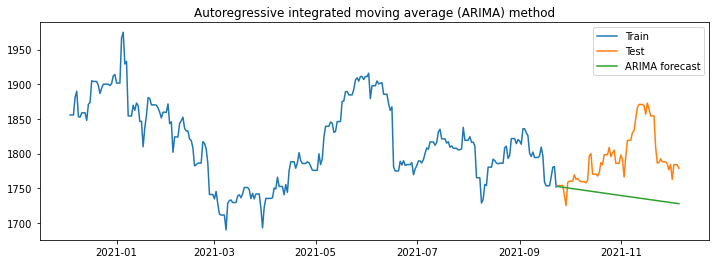

In [50]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [51]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_arima['arima_forecast'][test.index.min():])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,67.7,3.03


In [58]:
test_prediction = model_fit.forecast(130)

In [59]:
test_prediction

2021-09-24    7.468738
2021-09-25    7.468526
2021-09-26    7.468331
2021-09-27    7.468137
2021-09-28    7.467942
                ...   
2022-01-27    7.444377
2022-01-28    7.444183
2022-01-29    7.443988
2022-01-30    7.443793
2022-01-31    7.443598
Freq: D, Name: predicted_mean, Length: 130, dtype: float64

### Saving the trained model

In [60]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(classifier,open(filename))